# SSN 6 2016.04.07

### Neuron z szumem

* Neuron często wzbudzany -> niedobór neurotransmiterów -> przestaje się wzbudzać, *relaksacja*
* Rozwiązanie - temperatura -> jak w Isingu :) Słucha się zewnętrznego pola z pewnym **prawdopodobieństem**. Neuron staje się **niedeterministyczny**
* To pozwala na formalizm fizyki statystycznej, modelu Isinga i wszystkich tego typu cudownych rzeczy

> Teoria magnetyzmu i przemian fazowych

* Wcześniej robiliśmy $S_i = sign(h_i)$, gdzie pole lokalne $h_i = U_i - T_i$
* Zakładamy że zewnętrzny **potencjał postsynaptyczny** $U_i$ = losowy gaussian z wartością średnią $<U_{i}>$, szerokością połówkową $\delta$ (rozkład taki jak zwykle gaussiany)

$$P(S_i=1) = \int_{T_i}^{\infty} P(U_i = <U_i>) du_i $$
* Dystrybuanta z gaussiana minus dystrybuanta
* Wzbudzenie - część gaussiana powyżej $T_i$ na osi poziomej
* Spoczynek - gaussian poniżej tego
* Neuron wciąż jest neuronem dwustanowym, mechanika dzialania dalej jest $S_i = sign(h_i) = sign(U_i - T_i)$

Bierzemy:
* Dystrybuantę gaussiana $F$
* *nieparzystą* funkcję błędu $erf(z) = \frac{2}{\sqrt{\pi}} \int_0^z exp(-x^2) dx$
* Można pokazać że $F = 1/2 [ 1 + erf(\frac{x-<x>}{\sqrt{2} \delta})] = 1/2 [ 1 + erf(\frac{U_i - T_i}{\delta \sqrt{2}})]$

Dostajemy:
$$P(S_i = -1) = \frac{1}{2} [ 1 - erf(\frac{h_i}{\delta \sqrt{2}})]$$
$$P(S_i = +1) = \frac{1}{2} [ 1 + erf(\frac{h_i}{\delta \sqrt{2}})]$$

Co przez nieparzystość, wstawiając znów pole lokalne $h_i$ uogólnia się do
$$P(S_i) = \frac{1}{2} [ 1 + erf(\frac{h_i S_i}{\delta \sqrt{2}})]$$

erf można przybliżyć (oznaczmy $\delta \sqrt{2} = \beta^{-1}$) z 1% błędu

$$P(S_i) = \frac{1}{2} [1 + \tanh{\beta h_i S_i}]$$

> Dlaczego można ERF przybliżyć tangensem hiperbolicznym?

Beta związana jest z szerokością połówkową, więc i z miarą szumu stanu neuronu, więc z *formalną* temperaturą $\beta = T^{-1}$ (bez stałej ~~Bosmana~~Boltzmanna bo tu przecież nie ma tak naprawdę energii. Stan neuronu zmienia się nie o $k=1.38e-23 J/k$, tylko o coś rzędu $S_i = 1$. Sensownie wziąć $k = 1$.

Wykres prawdopodobieństwa $S_i = +1$ w funkcji h_i. Jak na fsitach - to nie jest już krokowy Heaviside jak w Isingu dla $T=0$, ale rozmyty tangens hiperboliczny. $\beta -> 1$ dla tego Heaviside'a, co łatwo pokazać.

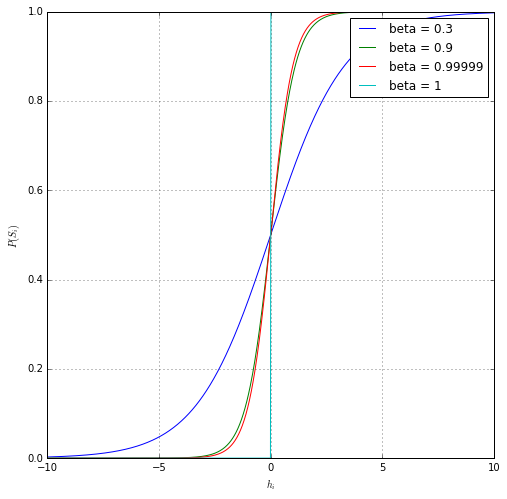

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

h = np.linspace(-10, 10, 1000)
def Ps_i(h, beta):
    return 0.5 * (1 + np.tanh(beta*h))

fig, axes = plt.subplots(figsize=(8,8))
for beta in (0.3, 0.9, 0.99999):
    axes.plot(h, Ps_i(h, beta), label="beta = {}".format(beta))
axes.plot(h, (np.sign(h)+1)/2, label="beta = 1")
axes.legend()
axes.set_ylabel("$P(S_i)$")
axes.set_xlabel("$h_i$")
axes.grid()

### Ewolucja czasowa sieci neuronowej: krajobraz energetyczny

$$ E(\{S_i\}) = -0.5 \sum_{i,j} J_{ij} S_i S_j$$
$\{S_i\}$ jest wektorem spinów. Generalnie wsio jak w Isingu.

W czasie ewolucji czasowej energia układu maleje bądź jest stała. To obserwujemy w przyrodzie.
$$E(s_i(t)) >= E(S_i(t+1))$$
**Można znaleźć dowód tego dla sieci Hopfielda i przynieść na jakieś punkty egzaminowe**
Ta energia tworzy n-wymiarową powierzchnię, całkiem skomplikowaną - ewolucja czasowa polega 
na ruchu po tej powierzchni.

Można o tym myśleć jako o powierzchni w sferycznych, $r(\theta, \phi)$, funkcji wektora $S_i$ - dla różnych konfiguracji są różne energie. Schodzimy w stronę tej, która ma niższą energię w każdym kroku - i w każdym spadamy na niższą energię.

Tworząc wzorce kształtujemy krajobraz energetyczny sieci - rozkładamy minima w przestrzeni.
Dlatego nie możemy tam wsadzić za dużo wzorców, bo baseny atrakcji będą się pokrywały.

Lokalne minima nieodpowiadające wzorcom - **atraktory pasożytnicze, szkodliwe** - problematyczne bo sieć może tam wpaść i nie wyjść. Tworzą się samorzutnie, to kicha.

Sieć z temperaturą jest w stanie wyjść z aktraktora pasożytniczego. Drganie

<img src="ssn6r1.png" width = "700">

## Sztuczne sieci neuronowe z czasem ciągłym
(niewymagane na egzaminie)
Model: potencjał $U_i$ robimy deterministycznie jako zależny od
* Prądów indukowanych przez neuronki presynaptyczne
* Upływu przez błony komórkowe o oporze R_i (modelujemy jako opornik)
* Dopływu prądów z otoczenia

$$ c_i \frac{dU_i}{dt} = \sum_{j\neq i} J_{ij} g(U_i) - \frac{U_i}{R_i} + I_i$$
Kolejno: pojemność nauronu, potencjał neuronu (zmiana w czasie), suma aktywności innych neuronów i sprzężenia z bieżącym, upływność z bieżącego neuronu, prądy dopływające do naszego neuronu.

## Teoria pola średniego dla sztucznych sieci neuronowych
Duh, Ising. Dla neuronu z szumem:
$$<S_i> = \tanh{\beta h_i}$$

W sieci hopfielda:
$$h_i = \sum_{i=1}^{N} J_{ij} S_i$$
$$J_{ij} = 1/N \sum_{M=1}^P \xi_i^P \xi_j^P$$
($\xi^P$ - p-ty wzorzec, eigenwartość)

$$<h_i> = \sum_{j=1, j \neq i} J_{ij} <S_j> = 1/N \sum_{j, j \neq i} \sum_{\mu = 1}^P \xi_i^\mu \xi_j^mu <S_j>$$

Wstawiamy $J_{ij}$, robimy sumę po *wszystkich* $j$ i odejmujemy składnik dla $j=i$ otrzymując
$$<h_i> = \sum_{\mu=1}^P ( 1/N \sum_{j=1}^N \xi_i^\mu \xi_j^\mu <S_j> - 1/N \xi_i^\mu \xi_i^\mu <S_i>)$$

Definiujemy średni overlap (zamieniając po prostu $m$ oraz $S_j$ na ich wartości średnie):

$$<m^{\mu}> = 1/N \sum_{j=1}^N \xi_j^{\mu} <S_j>$$

Wstawiamy overlap do średniego pola lokalnego

$$<h_i> = \sum_{\mu = 1}^P <m^\mu> \xi_i^\mu - P/N <S_i> $$

Dla dużych sieci ostatni człon ($h^{ext}) zanika i stabilność rozpoznawania wzorców rośnie. Dla małych sieci... tu jest gorzej.

Podsumowując,

$$<S_i> = \tanh{\Big(\beta \sum_{j=1}^N J_{ij} <S_j> + \beta h^{ext}\Big)}$$